                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:               673931
Model:                            GLM   Df Residuals:                   673926
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27334.
Date:                Sat, 18 Jan 2025   Deviance:                       54668.
Time:                        22:11:38   Pearson chi2:                 6.88e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01060
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   3.15e-06     49.155      0.0

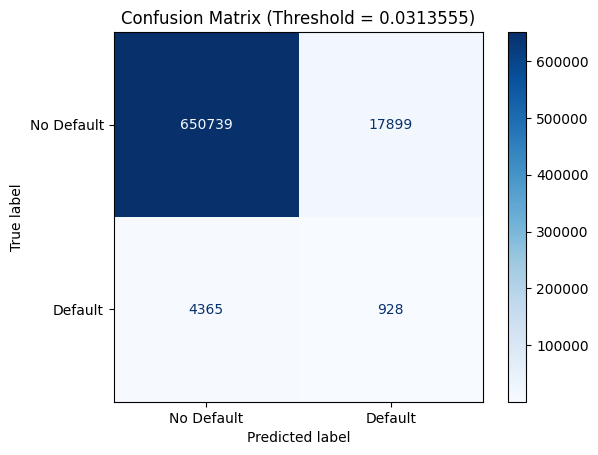

Threshold: 0.0313555
Precision: 0.05, Recall: 0.18, F1-Score: 0.08

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:              1337276
Model:                            GLM   Df Residuals:                  1337271
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.0777e+05
Date:                Sat, 18 Jan 2025   Deviance:                   1.4155e+06
Time:                        22:11:40   Pearson chi2:                 1.34e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2795
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

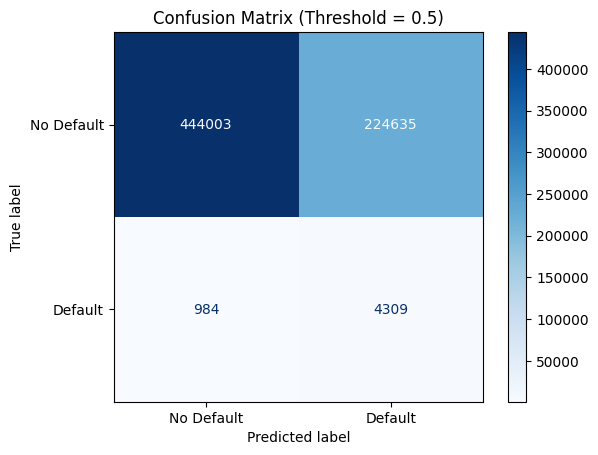

Threshold: 0.5
Precision: 0.02, Recall: 0.81, F1-Score: 0.04



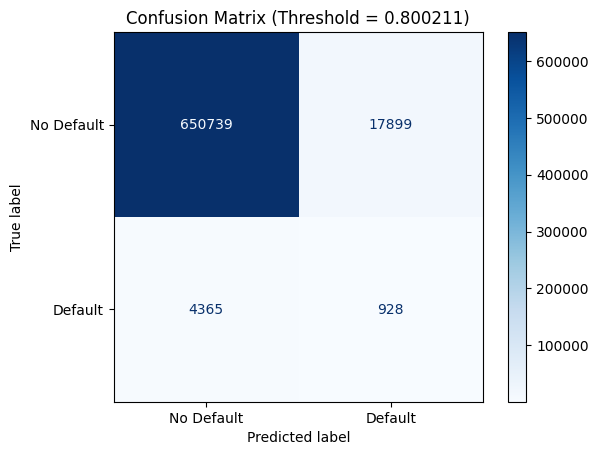

Threshold: 0.800211
Precision: 0.05, Recall: 0.18, F1-Score: 0.08



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

def load_data():
    url = "https://raw.githubusercontent.com/jh85/glm/refs/heads/main/default_risk.csv.gz"
    df = pd.read_csv(url, compression="gzip")
    return df

def evaluate_threshold(y_true, predictions, threshold):
    """
    Evaluate model performance at a specific threshold.
    """
    # Convert probabilities to binary classes
    predicted_classes = (predictions >= threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Threshold = {threshold})")
    plt.show()

    # Calculate precision, recall, and F1-score
    precision, recall, f1, support = precision_recall_fscore_support(y_true, predicted_classes, average="binary")
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}\n")

def logistic_regression_on_imbalanced_data():
    df = load_data()
    y = df["Default"]
    X = df[["RiskLevel", "YOB", "Year", "DJX_Return", "GDP"]]

    # Build Logistic model and fit
    X = sm.add_constant(X)
    model = sm.GLM(y,X,family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())
    predictions = result.predict(exog=X)

    # Evaluate at the best threshold
    threshold = 0.0313555
    evaluate_threshold(y, predictions, threshold)

def logistic_regression_on_balanced_data():
    df = load_data()
    y = df["Default"]
    X = df[["RiskLevel", "YOB", "Year", "DJX_Return", "GDP"]]

    # Oversampling with SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Build Logistic model and fit on balanced dataset
    X_resampled = sm.add_constant(X_resampled)
    model = sm.GLM(y_resampled, X_resampled, family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())

    # Evaluate on the original data
    X = sm.add_constant(X)
    predictions = result.predict(exog=X)
    threshold = 0.5
    evaluate_threshold(y, predictions, threshold)

    # Evaluate at the best threshold
    threshold = 0.800211
    evaluate_threshold(y, predictions, threshold)

def main():
    logistic_regression_on_imbalanced_data()
    logistic_regression_on_balanced_data()

main()